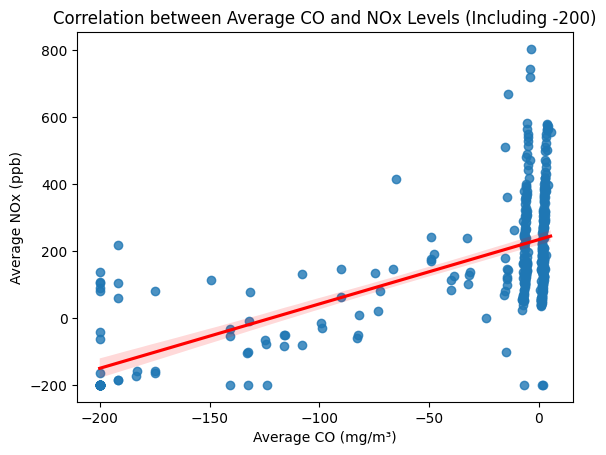

The correlation coefficient (r) including -200 is: 0.6526247860418649


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the file
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Question1.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Include all data, including -200, in the analysis
# No filtering is applied here

# Generate the scatter plot with a trendline
sns.regplot(x='Avg_CO', y='Avg_NOx', data=data, line_kws={"color": "red"})
plt.title('Correlation between Average CO and NOx Levels (Including -200)')
plt.xlabel('Average CO (mg/m³)')
plt.ylabel('Average NOx (ppb)')

# Show the plot
plt.show()

# Calculate the correlation matrix including -200
correlation_coefficient = data[['Avg_CO', 'Avg_NOx']].corr().iloc[0, 1]

print(f"The correlation coefficient (r) including -200 is: {correlation_coefficient}")


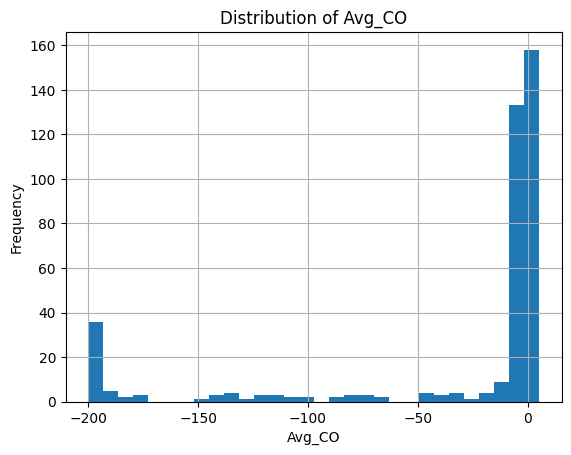

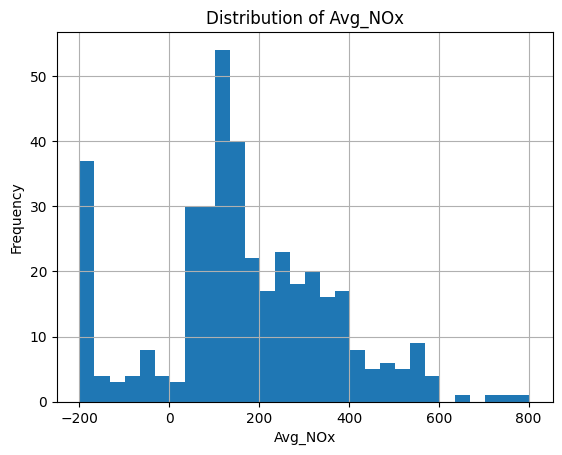

In [36]:
import matplotlib.pyplot as plt

#cleaned_data = data[data['Avg_CO'] > -200]
# Histogram for Avg_CO
data['Avg_CO'].hist(bins=30)
plt.title('Distribution of Avg_CO')
plt.xlabel('Avg_CO')
plt.ylabel('Frequency')
plt.show()

# Histogram for Avg_NOx
data['Avg_NOx'].hist(bins=30)
plt.title('Distribution of Avg_NOx')
plt.xlabel('Avg_NOx')
plt.ylabel('Frequency')
plt.show()


In [39]:
# Count the number of -200 values in Avg_CO and Avg_NOx columns
invalid_counts = data[['Avg_CO', 'Avg_NOx']].apply(lambda col: (col == -200).sum())
print("Count of -200 values:")
print(invalid_counts)

# Replace -200 with NaN (use assignment instead of inplace=True)
data['Avg_CO'] = data['Avg_CO'].replace(-200, pd.NA)
data['Avg_NOx'] = data['Avg_NOx'].replace(-200, pd.NA)

# Example: Fill missing values with the mean (if needed)
data['Avg_CO'] = data['Avg_CO'].fillna(data['Avg_CO'].mean())
data['Avg_NOx'] = data['Avg_NOx'].fillna(data['Avg_NOx'].mean())





Count of -200 values:
Avg_CO     0
Avg_NOx    0
dtype: int64


In [43]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
invalid_dates = data['Date'].isna().sum()
print(f"Number of invalid dates: {invalid_dates}")
data = data.dropna(subset=['Date'])



Number of invalid dates: 0


In [44]:
data = data.sort_values(by='Date')  # Sort by date if not already sorted
time_differences = data['Date'].diff()
print(time_differences.describe())


count                390
mean     1 days 00:00:00
std      0 days 00:00:00
min      1 days 00:00:00
25%      1 days 00:00:00
50%      1 days 00:00:00
75%      1 days 00:00:00
max      1 days 00:00:00
Name: Date, dtype: object


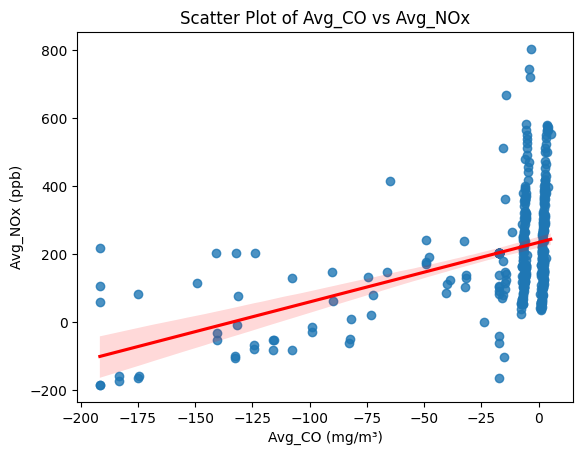

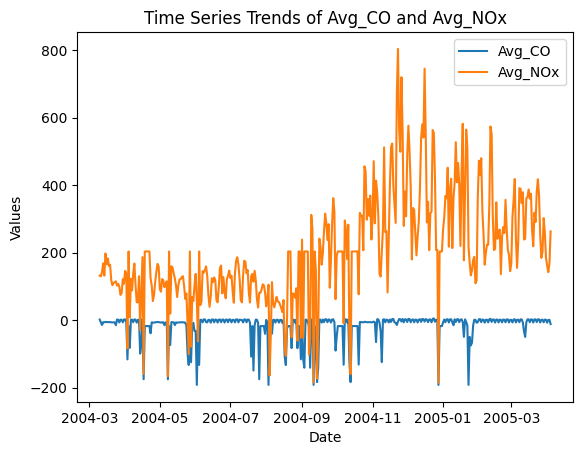

In [48]:
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Avg_CO', y='Avg_NOx', data=data, line_kws={"color": "red"})
plt.title('Scatter Plot of Avg_CO vs Avg_NOx')
plt.xlabel('Avg_CO (mg/m³)')
plt.ylabel('Avg_NOx (ppb)')
plt.show()

plt.plot(data['Date'], data['Avg_CO'], label='Avg_CO')
plt.plot(data['Date'], data['Avg_NOx'], label='Avg_NOx')
plt.legend()
plt.title('Time Series Trends of Avg_CO and Avg_NOx')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()


           Avg_CO   Avg_NOx
Avg_CO   1.000000  0.440819
Avg_NOx  0.440819  1.000000


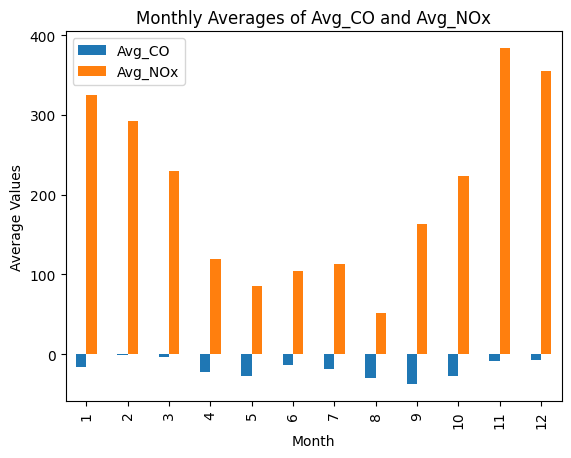

In [52]:
correlation = data[['Avg_CO', 'Avg_NOx']].corr()
print(correlation)


data['Month'] = data['Date'].dt.month
monthly_avg = data.groupby('Month')[['Avg_CO', 'Avg_NOx']].mean()
monthly_avg.plot(kind='bar', title='Monthly Averages of Avg_CO and Avg_NOx')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.show()



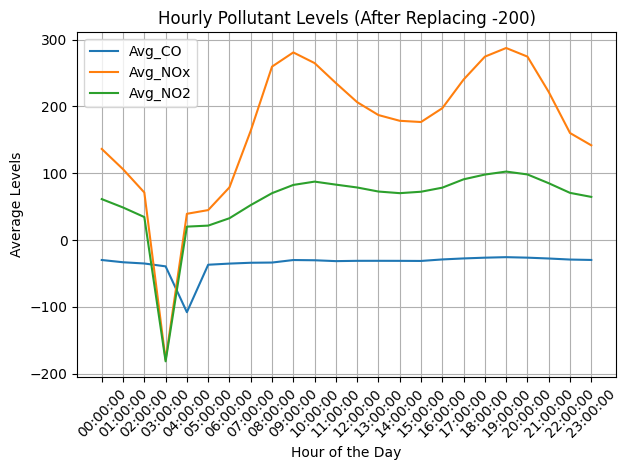

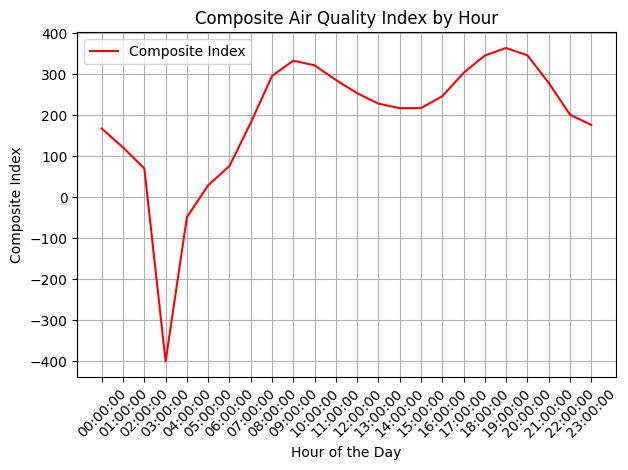

Cleaned data saved to /Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned_replaced.csv


In [67]:

# Count the number of -200 values in Avg_CO and Avg_NOx columns
invalid_counts = data[['Avg_CO', 'Avg_NOx','Avg_NO2']].apply(lambda col: (col == -200).sum())
print("Count of -200 values:")
print(invalid_counts)



Count of -200 values:
Avg_CO     0
Avg_NOx    0
Avg_NO2    0
dtype: int64


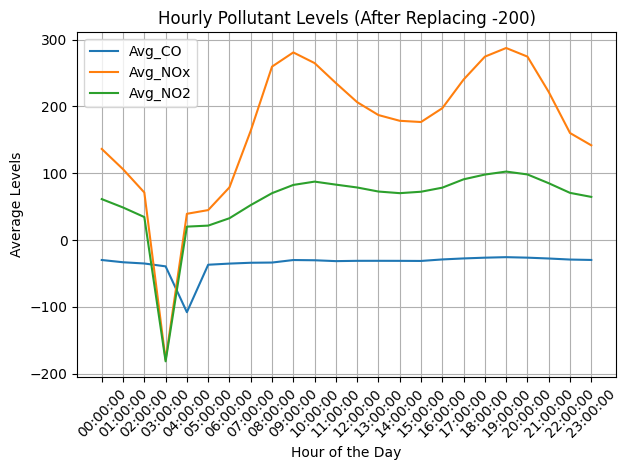

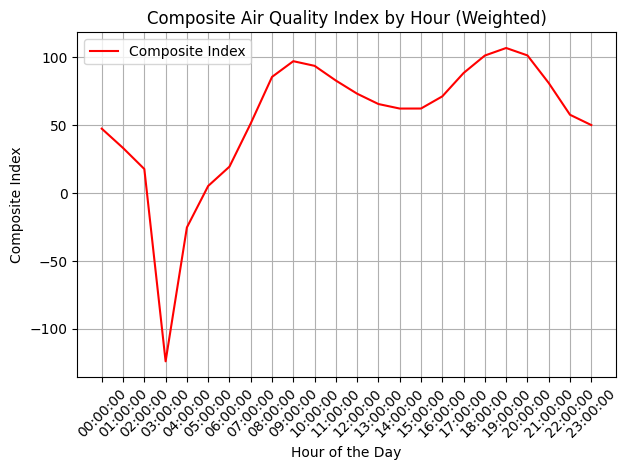

Cleaned data with weights saved to /Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned_with_weights.csv


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned.csv'
data = pd.read_csv(file_path)

# Replace -200 values with the column mean for pollutant columns
pollutants = ['Avg_CO', 'Avg_NOx', 'Avg_NO2']
for pollutant in pollutants:
    mean_value = data[data[pollutant] != -200][pollutant].mean()  # Calculate mean excluding -200
    data[pollutant] = data[pollutant].replace(-200, mean_value)  # Replace -200 with the mean

# Define weights for pollutants
weights = {'Avg_CO': 0.4, 'Avg_NOx': 0.3, 'Avg_NO2': 0.3}  # Adjust weights as necessary

# Calculate the weighted Composite Index
data['Composite_Index'] = (
    data['Avg_CO'] * weights['Avg_CO'] +
    data['Avg_NOx'] * weights['Avg_NOx'] +
    data['Avg_NO2'] * weights['Avg_NO2']
)

# Sort the data by Hour
data = data.sort_values(by='Hour')

# Plot pollutant levels by hour
plt.plot(data['Hour'], data['Avg_CO'], label='Avg_CO')
plt.plot(data['Hour'], data['Avg_NOx'], label='Avg_NOx')
plt.plot(data['Hour'], data['Avg_NO2'], label='Avg_NO2')
plt.title('Hourly Pollutant Levels (After Replacing -200)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Levels')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Ensure labels fit within the plot
plt.show()

# Plot composite index
plt.plot(data['Hour'], data['Composite_Index'], label='Composite Index', color='red')
plt.title('Composite Air Quality Index by Hour (Weighted)')
plt.xlabel('Hour of the Day')
plt.ylabel('Composite Index')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Ensure labels fit within the plot
plt.show()

# Save the updated dataset back to a file (optional)
output_path = '/Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned_with_weights.csv'
data.to_csv(output_path, index=False)
print(f"Cleaned data with weights saved to {output_path}")


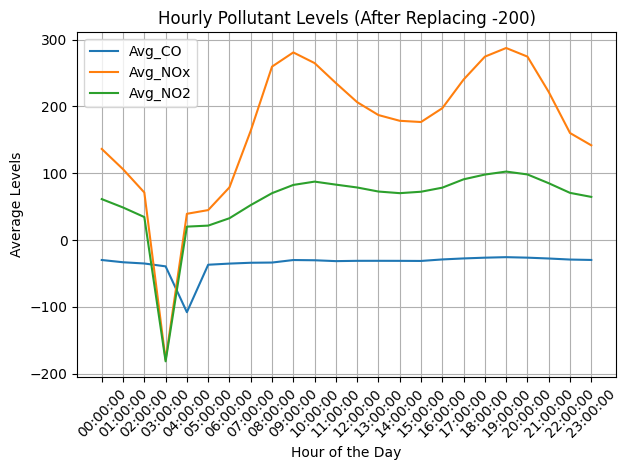

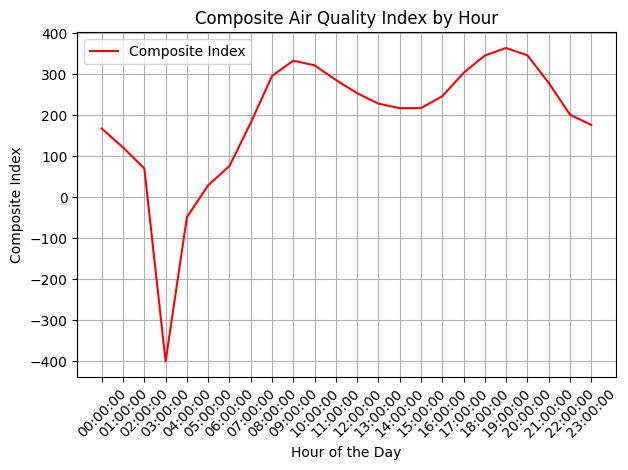

Cleaned data saved to /Users/saurabhkankekar/Downloads/air+quality/hourly_cleaned_replaced.csv


Correlation between Temperature and Absolute Humidity: 0.6563969795767116


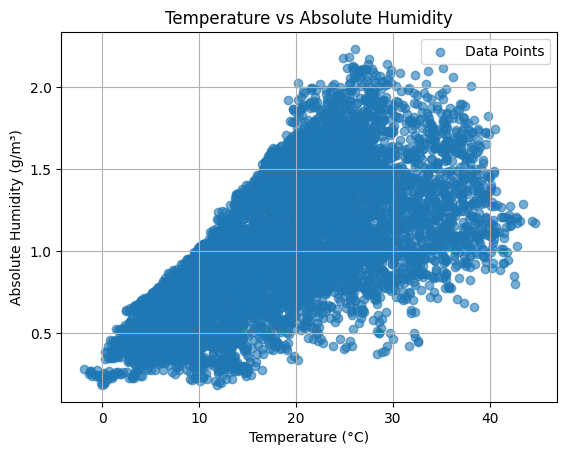

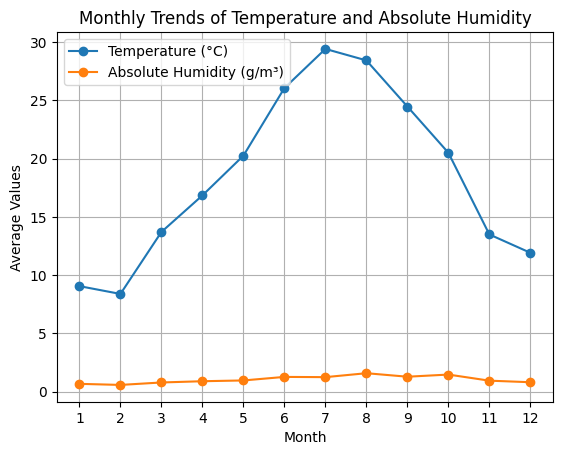

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques3.csv'  # Replace with actual file path
data = pd.read_csv(file_path)

# Replace -200 with column mean for both Temperature and Absolute_Humidity
columns_to_clean = ['Temperature', 'Absolute_Humidity']
for column in columns_to_clean:
    mean_value = data[data[column] != -200][column].mean()
    data[column] = data[column].replace(-200, mean_value)

# Convert Date to datetime format for further analysis
data['Date'] = pd.to_datetime(data['Date'])

# Correlation between Temperature and Absolute Humidity
correlation = data['Temperature'].corr(data['Absolute_Humidity'])
print(f"Correlation between Temperature and Absolute Humidity: {correlation}")

# Scatter plot: Temperature vs Absolute Humidity
plt.scatter(data['Temperature'], data['Absolute_Humidity'], alpha=0.6, label='Data Points')
plt.title('Temperature vs Absolute Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Absolute Humidity (g/m³)')
plt.grid()
plt.legend()
plt.show()

# Add a Month column for seasonal trend analysis
data['Month'] = data['Date'].dt.month

# Monthly trends for Temperature and Absolute Humidity
monthly_trends = data.groupby('Month')[['Temperature', 'Absolute_Humidity']].mean()

# Plot monthly trends
plt.plot(monthly_trends.index, monthly_trends['Temperature'], label='Temperature (°C)', marker='o')
plt.plot(monthly_trends.index, monthly_trends['Absolute_Humidity'], label='Absolute Humidity (g/m³)', marker='o')
plt.title('Monthly Trends of Temperature and Absolute Humidity')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()


In [89]:
#Question 4


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/saurabhkankekar/Downloads/air+quality/Ques4.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Print column names to verify
print("Available columns:", data.columns)

# List of sensor columns to clean
sensor_columns = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Filter sensor columns to include only those that exist in the dataset
sensor_columns = [col for col in sensor_columns if col in data.columns]

# Replace -200 values with the column mean
for column in sensor_columns:
    mean_value = data[data[column] != -200][column].mean()  # Calculate mean excluding -200
    data[column] = data[column].replace(-200, mean_value)  # Replace -200 with the mean

# Add an Hour column for aggregation
data['Hour'] = data['Time'].str[:2]  # Extract hour from the Time column

# Aggregate data to calculate average sensor outputs per hour
average_sensor_outputs = data.groupby('Hour')[sensor_columns].mean()

# Find the sensor with the highest average output during peak traffic hours
max_sensor = average_sensor_outputs.mean().idxmax()
print(f"The sensor with the highest average output during peak traffic hours is: {max_sensor}")

# Plot average sensor outputs during peak traffic hours
plt.figure(figsize=(10, 6))
for sensor in average_sensor_outputs.columns:
    plt.plot(average_sensor_outputs.index, average_sensor_outputs[sensor], label=sensor, marker='o', alpha=0.8)

plt.title('Average Sensor Outputs During Peak Traffic Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sensor Output')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Save the cleaned dataset for future use
output_file_path = '/path/to/cleaned_peak_hours.csv'  # Replace with the desired output file path
data.to_csv(output_file_path, index=False)
print(f"Cleaned data saved to {output_file_path}")


Available columns: Index(['Date', 'Time', 'Sensor_CO', 'Sensor_NMHC', 'Sensor_NOx', 'Sensor_NO2',
       'Sensor_O3'],
      dtype='object')


ValueError: attempt to get argmax of an empty sequence